# Tree Based Modelling (CatBoost)
## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Split DateTime into separate columns

In [13]:
# weather = pd.read_csv('../data/processed/merged_cleaned_weather_data.csv')
weather = pd.read_csv('../data/processed/weather_imputed.csv')
weather['DATE']=pd.to_datetime(weather['DATE'])
weather['year'] = weather['DATE'].dt.year
weather['month'] = weather['DATE'].dt.month
weather['day'] = weather['DATE'].dt.day
weather['hour'] = weather['DATE'].dt.hour
weather.drop(columns=["REPORT_TYPE", "DATE"], inplace=True)
print(weather.head())

   wind_speed_raw  wind_dir_sin  wind_dir_cos  ceiling_coverage  visibility_m  \
0            28.0     -0.866025     -0.500000               0.0        6000.0   
1            30.5     -0.642788     -0.766044               0.0        6000.0   
2            35.5     -0.571394     -0.816035               0.0        6000.0   
3            25.5     -0.704416     -0.704416               0.0        5000.0   
4            28.0     -0.571394     -0.816035               0.0        5000.0   

   temperature_C  SLP_hpa  DEW_C  MA1_main  MA1_sec   GA1_amt   GA1_height  \
0           0.05   1030.2  -0.95   10280.0   9996.0  4.500000   720.000000   
1           0.90   1029.9  -0.90   10280.0   9994.0  7.000000   705.000000   
2           0.90   1028.6  -1.00   10270.0   9981.0  5.000000   750.500000   
3          -0.90   1027.3  -1.90   10250.0   9967.0  5.166667   927.166667   
4          -1.00   1026.3  -2.15   10240.0   9957.0  5.333333  1103.833333   

   GA1_type  MD1_m1  MD1_m2  year  month  da

## Load air quality

In [14]:
air_quality = pd.read_csv('../data/processed/air_quality_2019_2023_long.csv')
print(air_quality.head())

   year  month  day  weekday  hour  day_of_year  hour_sin  hour_cos   doy_sin  \
0  2019      1    1        1     1            1  0.258819  0.965926  0.017202   
1  2019      1    1        1     2            1  0.500000  0.866025  0.017202   
2  2019      1    1        1     3            1  0.707107  0.707107  0.017202   
3  2019      1    1        1     4            1  0.866025  0.500000  0.017202   
4  2019      1    1        1     5            1  0.965926  0.258819  0.017202   

    doy_cos  weekday_sin  weekday_cos  station_code     pm10  pm10_lag_1  \
0  0.999852     0.781831      0.62349  MpKrakAlKras  88.2185         NaN   
1  0.999852     0.781831      0.62349  MpKrakAlKras  95.2209     88.2185   
2  0.999852     0.781831      0.62349  MpKrakAlKras  85.3689     95.2209   
3  0.999852     0.781831      0.62349  MpKrakAlKras  70.8575     85.3689   
4  0.999852     0.781831      0.62349  MpKrakAlKras  50.1935     70.8575   

   pm10_lag_2  
0         NaN  
1         NaN  
2     88

## Merge Weather with Air Quality

In [19]:
merged_df = pd.merge(
    air_quality,
    weather,
    on=["year", "month", "day", "hour"],
    how="left"
)


print(merged_df.head())
print(merged_df.shape)


   year  month  day  weekday  hour  day_of_year  hour_sin  hour_cos   doy_sin  \
0  2019      1    1        1     1            1  0.258819  0.965926  0.017202   
1  2019      1    1        1     2            1  0.500000  0.866025  0.017202   
2  2019      1    1        1     3            1  0.707107  0.707107  0.017202   
3  2019      1    1        1     4            1  0.866025  0.500000  0.017202   
4  2019      1    1        1     5            1  0.965926  0.258819  0.017202   

    doy_cos  ...  temperature_C  SLP_hpa DEW_C  MA1_main  MA1_sec   GA1_amt  \
0  0.999852  ...           0.90   1029.9 -0.90   10280.0   9994.0  7.000000   
1  0.999852  ...           0.90   1028.6 -1.00   10270.0   9981.0  5.000000   
2  0.999852  ...          -0.90   1027.3 -1.90   10250.0   9967.0  5.166667   
3  0.999852  ...          -1.00   1026.3 -2.15   10240.0   9957.0  5.333333   
4  0.999852  ...          -0.65   1025.0 -1.70   10230.0   9945.0  5.500000   

    GA1_height  GA1_type  MD1_m1  MD1_

## Check for NaNs

In [16]:
merged_df.isna().sum()

year                   0
month                  0
day                    0
weekday                0
hour                   0
day_of_year            0
hour_sin               0
hour_cos               0
doy_sin                0
doy_cos                0
weekday_sin            0
weekday_cos            0
station_code           0
pm10                   0
pm10_lag_1          1171
pm10_lag_2          1795
wind_speed_raw      1717
wind_dir_sin        1717
wind_dir_cos        1717
ceiling_coverage    1717
visibility_m        1717
temperature_C       1717
SLP_hpa             1717
DEW_C               1717
MA1_main            1717
MA1_sec             1717
GA1_amt             1717
GA1_height          1717
GA1_type            1717
MD1_m1              1717
MD1_m2              1717
dtype: int64

In [17]:
merged_df.head()

,year,month,day,weekday,hour,day_of_year,hour_sin,hour_cos,doy_sin,doy_cos,...,temperature_C,SLP_hpa,DEW_C,MA1_main,MA1_sec,GA1_amt,GA1_height,GA1_type,MD1_m1,MD1_m2
0,2019,1,1,1,1,1,0.258819,0.965926,0.017202,0.999852,...,0.90,1029.9,-0.90,10280.0,9994.0,7.000000,705.000000,6.0,7.0,11.0
1,2019,1,1,1,2,1,0.500000,0.866025,0.017202,0.999852,...,0.90,1028.6,-1.00,10270.0,9981.0,5.000000,750.500000,6.0,8.0,21.0
2,2019,1,1,1,3,1,0.707107,0.707107,0.017202,0.999852,...,-0.90,1027.3,-1.90,10250.0,9967.0,5.166667,927.166667,2.0,8.0,29.0
3,2019,1,1,1,4,1,0.866025,0.500000,0.017202,0.999852,...,-1.00,1026.3,-2.15,10240.0,9957.0,5.333333,1103.833333,2.0,6.0,37.0
4,2019,1,1,1,5,1,0.965926,0.258819,0.017202,0.999852,...,-0.65,1025.0,-1.70,10230.0,9945.0,5.500000,1280.500000,6.0,7.0,36.0


## Drop repeated columns

In [20]:
merged_df.drop(columns=["weekday", "day_of_year"], inplace=True)

## Create dataframes for each of the stations 

In [21]:
merged_df.dropna()
stations = ["MpKrakAlKras", "MpKrakBujaka", "MpKrakBulwar", "MpKrakOsPias", "MpKrakSwoszo", "MpKrakWadow", "MpKrakZloRog"]
stations_df = []
for station in stations:
    stations_df.append(merged_df.loc[merged_df['station_code'] == station])


## Mark the categorical columns

In [22]:
cat_columns = ["month", "station_code"]

# Model Per Station

In [9]:
from catboost import CatBoostRegressor

for station in stations_df:
    X_full = station.drop(columns=['pm10'])
    y = pd.to_numeric(station["pm10"])

    X_train, X_test, y_train, y_test = train_test_split(
        X_full, y, test_size=0.2, random_state=42
    )

    cat_features = [X_train.columns.get_loc(col) for col in cat_columns]
    
    catboost = CatBoostRegressor(cat_features=cat_features, verbose=0, random_state=42)
    catboost.fit(X_train, y_train)
    
    y_pred_cat = catboost.predict(X_test)
    mse_cat = mean_squared_error(y_test, y_pred_cat)
    print(f"{station["station_code"].head(1)} CatBoost MSE: {mse_cat:.2f}")

0    MpKrakAlKras
Name: station_code, dtype: object CatBoost MSE: 154.49
34604    MpKrakBujaka
Name: station_code, dtype: object CatBoost MSE: 129.38
77515    MpKrakBulwar
Name: station_code, dtype: object CatBoost MSE: 130.30
120588    MpKrakOsPias
Name: station_code, dtype: object CatBoost MSE: 97.78
161920    MpKrakSwoszo
Name: station_code, dtype: object CatBoost MSE: 97.76
204379    MpKrakWadow
Name: station_code, dtype: object CatBoost MSE: 95.17
247796    MpKrakZloRog
Name: station_code, dtype: object CatBoost MSE: 103.53


# General Model

In [23]:
X_full = merged_df.drop(columns=['pm10'])
y = pd.to_numeric(merged_df["pm10"])

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

cat_features = [X_train.columns.get_loc(col) for col in cat_columns]
    
catboost = CatBoostRegressor(cat_features=cat_features, verbose=0, random_state=42)
catboost.fit(X_train, y_train)
    
y_pred_cat = catboost.predict(X_test)
mse_cat = mean_squared_error(y_test, y_pred_cat)
print(f"CatBoost MSE: {mse_cat:.2f}")

CatBoost MSE: 50.01


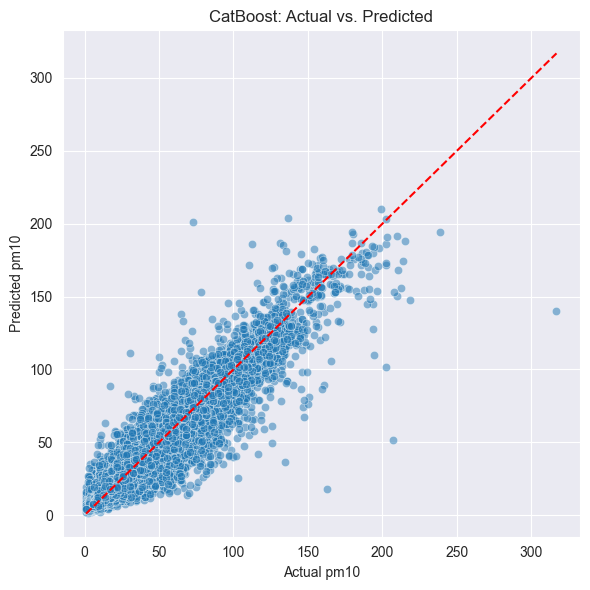

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions(y_true, y_pred, title="Actual vs. Predicted"):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.xlabel("Actual pm10")
    plt.ylabel("Predicted pm10")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example for CatBoost
plot_predictions(y_test, y_pred_cat, title="CatBoost: Actual vs. Predicted")

## Feature Importance

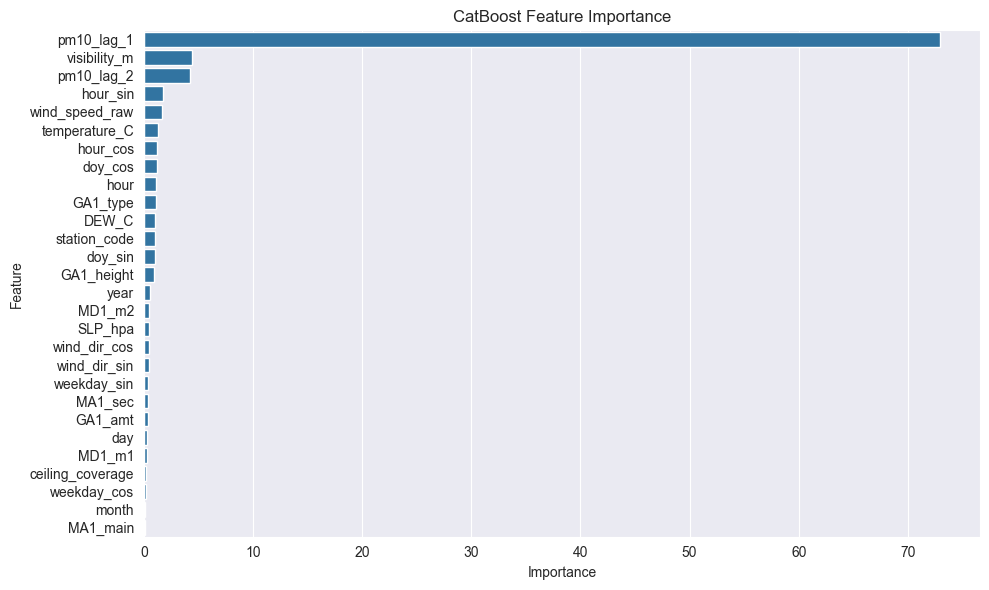

In [25]:
    # Feature Importance for CatBoost
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = catboost.get_feature_importance()
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Cross Validate to check if it wasn't a lucky split

In [26]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
import numpy as np

catboost = CatBoostRegressor(cat_features=cat_features, verbose=0, random_state=42)

cv_scores_cat = cross_val_score(
    catboost,
    X_full,
    y,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

print(f"CatBoost 5-fold CV Mean MSE: {abs(cv_scores_cat.mean()):.2f} ± {cv_scores_cat.std():.2f}")

CatBoost 5-fold CV Mean MSE: 56.96 ± 16.26


## Hyperparameter Tuning

In [27]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    "iterations": [200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "bagging_temperature": [0, 0.5, 1, 2],
    "border_count": [32, 64, 128]
}

catboost = CatBoostRegressor(cat_features=cat_features, verbose=0, random_state=42)

random_search = RandomizedSearchCV(
    catboost,
    param_distributions=param_dist,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_full, y)

print("Best parameters:", random_search.best_params_)
print("Best CV RMSE:", abs(random_search.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 7, 'iterations': 500, 'depth': 10, 'border_count': 128, 'bagging_temperature': 2}
Best CV RMSE: 7.513323201041272


## Save trained tuned model

In [28]:
from catboost import CatBoostRegressor
import joblib

# Train final model on all data with best params
final_model = CatBoostRegressor(**random_search.best_params_, cat_features=cat_features, verbose=0, random_state=42)
final_model.fit(X_full, y)

# Save the final model
joblib.dump(final_model, "../models/catboost_best_model.pkl")

['../models/catboost_best_model.pkl']